<h1><font color='blue'> 8E and 8F: Finding the Probability P(Y==1|X)</font></h1>

<h2><font color='Geen'> 8E: Implementing Decision Function of SVM RBF Kernel</font></h2>

<font face=' Comic Sans MS' size=3>After we train a kernel SVM model, we will be getting support vectors and their corresponsing coefficients $\alpha_{i}$

Check the documentation for better understanding of these attributes: 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
<img src='https://i.imgur.com/K11msU4.png' width=500>

As a part of this assignment you will be implementing the ```decision_function()``` of kernel SVM, here decision_function() means based on the value return by ```decision_function()``` model will classify the data point either as positive or negative

Ex 1: In logistic regression After traning the models with the optimal weights $w$ we get, we will find the value $\frac{1}{1+\exp(-(wx+b))}$, if this value comes out to be < 0.5 we will mark it as negative class, else its positive class

Ex 2: In Linear SVM After traning the models with the optimal weights $w$ we get, we will find the value of $sign(wx+b)$, if this value comes out to be -ve we will mark it as negative class, else its positive class.

Similarly in Kernel SVM After traning the models with the coefficients $\alpha_{i}$ we get, we will find the value of 
$sign(\sum_{i=1}^{n}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here $K(x_{i},x_{q})$ is the RBF kernel. If this value comes out to be -ve we will mark $x_{q}$ as negative class, else its positive class.

RBF kernel is defined as: $K(x_{i},x_{q})$ = $exp(-\gamma ||x_{i} - x_{q}||^2)$

For better understanding check this link: https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation
</font>

## Task E

> 1. Split the data into $X_{train}$(60), $X_{cv}$(20), $X_{test}$(20)

> 2. Train $SVC(gamma=0.001, C=100.)$ on the ($X_{train}$, $y_{train}$)

> 3. Get the decision boundry values $f_{cv}$ on the $X_{cv}$ data  i.e. ` `$f_{cv}$ ```= decision_function(```$X_{cv}$```)```  <font color='red'>you need to implement this decision_function()</font>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np
from sklearn.svm import SVC

In [2]:
X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [3]:
from sklearn.model_selection import train_test_split
x_train,X_test,y_train,Y_test=train_test_split(X,y,test_size=0.40,stratify=y,random_state=42 )
x_cv,x_test,y_cv,y_test=train_test_split(X_test,Y_test,test_size=0.5,stratify=Y_test,random_state=42)
print('x_train',x_train.shape)
print('y_train',y_train.shape)
print('x_cv',x_cv.shape)
print('y_cv',y_cv.shape)
print('x_test',x_test.shape)
print('y_test',y_test.shape)

x_train (3000, 5)
y_train (3000,)
x_cv (1000, 5)
y_cv (1000,)
x_test (1000, 5)
y_test (1000,)


### Pseudo code

clf = SVC(gamma=0.001, C=100.)<br>
clf.fit(Xtrain, ytrain)

<font color='green'>def</font> <font color='blue'>decision_function</font>(Xcv, ...): #use appropriate parameters <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>for</font> a data point $x_q$ <font color='green'>in</font> Xcv: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='grey'>#write code to implement $(\sum_{i=1}^{\text{all the support vectors}}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here the values $y_i$, $\alpha_{i}$, and $intercept$ can be obtained from the trained model</font><br>
   <font color='green'>return</font> <font color='grey'><i># the decision_function output for all the data points in the Xcv</i></font>
    
fcv = decision_function(Xcv, ...)  <i># based on your requirement you can pass any other parameters </i>

<b>Note</b>: Make sure the values you get as fcv, should be equal to outputs of clf.decision_function(Xcv)


In [4]:
#standardising before applying svm for easy calcululation 
from sklearn import preprocessing
normalizer = preprocessing.Normalizer()
x_train= normalizer.fit_transform(x_train)
x_train.shape

from sklearn import preprocessing
normalizer = preprocessing.Normalizer()
x_cv= normalizer.fit_transform(x_cv)
x_cv.shape

from sklearn import preprocessing
normalizer = preprocessing.Normalizer()
x_test= normalizer.fit_transform(x_test)
x_test.shape

(1000, 5)

In [5]:
# you can write your code here
import random
model_clf = SVC(gamma=0.001, C=100,kernel="rbf")
model_clf.fit(x_train, y_train)
y_pred = model_clf.predict(x_test)
print("support_vectors",model_clf.support_vectors_.shape)

support_vectors (667, 5)


In [6]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[655  42]
 [ 25 278]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       697
           1       0.87      0.92      0.89       303

    accuracy                           0.93      1000
   macro avg       0.92      0.93      0.92      1000
weighted avg       0.93      0.93      0.93      1000



In [7]:
def decision_function(x_cv):
    alphas = model_clf.dual_coef_[0]
    decision_function = []
    for dp in x_cv:
        sum = model_clf.intercept_[0]
        for i,supvec in enumerate(model_clf.support_vectors_):
            norm = np.linalg.norm(supvec - dp)**2
            kernel = np.exp(-0.001*norm)
            #print(kernel)
            sum += (alphas[i]*kernel)
        #print(sum)
        decision_function.append(sum)
        
    return np.array(decision_function)

In [8]:
print("decision_function output shape",model_clf.decision_function(x_cv).shape)

decision_function output shape (1000,)


In [9]:
print("dual coeff shape",model_clf.dual_coef_.shape)

dual coeff shape (1, 667)


In [10]:
print(model_clf.decision_function(x_cv)[:10])

[-3.0089086   1.50715859  1.99033718 -1.65137204  2.21327284 -1.41470309
 -2.54105833 -1.91920896 -2.97507754 -2.66662818]


In [11]:
F_cv = decision_function(x_cv)
print(F_cv[:10])

[-3.0089086   1.50715859  1.99033718 -1.65137204  2.21327284 -1.41470309
 -2.54105833 -1.91920896 -2.97507754 -2.66662818]


<h2><font color='Geen'> 8F: Implementing Platt Scaling to find P(Y==1|X)</font></h2>

Check this <a href='https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a'>PDF</a>
<img src='https://i.imgur.com/CAMnVnh.png'>


## TASK F


> 4. Apply SGD algorithm with ($f_{cv}$, $y_{cv}$) and find the weight $W$ intercept $b$ ```Note: here our data is of one dimensional so we will have a one dimensional weight vector i.e W.shape (1,)``` 

> Note1: Don't forget to change the values of $y_{cv}$ as mentioned in the above image. you will calculate y+, y- based on data points in train data

> Note2: the Sklearn's SGD algorithm doesn't support the real valued outputs, you need to use the code that was done in the `'Logistic Regression with SGD and L2'` Assignment after modifying loss function, and use same parameters that used in that assignment.
<img src='https://i.imgur.com/zKYE9Oc.png'>
if Y[i] is 1, it will be replaced with y+ value else it will replaced with y- value

> 5. For a given data point from $X_{test}$, $P(Y=1|X) = \frac{1}{1+exp(-(W*f_{test}+ b))}$ where ` `$f_{test}$ ```= decision_function(```$X_{test}$```)```, W and b will be learned as metioned in the above step

In [13]:
Np=y_train[y_train>0].sum()
Nn=len(y_train)-Np
print("Number of positive classes in y_train:",Np)
print("Number of negative classes in y_train",Nn)
print("**"*20)
Yp = (Np+1)/(Np+2)
Yn = 1/(Nn+2)

modified_ycv = []

ycv_Np=y_cv[y_cv>0].sum()
ycv_Nn=len(y_cv)-Np
print("Number of positive classes in y_cv:",ycv_Np)
print("Number of negative classes in y_cv",ycv_Nn)

for y in y_cv:
    if y > 0:
        modified_ycv.append(Yp)
    else:
        modified_ycv.append(Yn)
modified_ycv = np.array(modified_ycv)
print(modified_ycv.shape)


Number of positive classes in y_train: 908
Number of negative classes in y_train 2092
****************************************
Number of positive classes in y_cv: 303
Number of negative classes in y_cv 92
(1000,)


In [14]:

import math
def initialize_weights(dim):
    ''' In this function, we will initialize our weights and bias'''
    #initialize the weights to zeros array of (1,dim) dimensions
    #you use zeros_like function to initialize zero
    #initialize bias to zero
    w = np.zeros_like(dim).reshape(1,-1)
    b = 0
    return w,b

def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    # compute sigmoid(z) and return
    result = 1/(1+np.exp(-z))
    return result

def logloss(y_true,y_pred,w,b):
    N = len(y_true)
    sum_log_loss=0
    for index in range(N):
        arg1=sigmoid(w*y_pred[index]+b)
        arg2=(1-arg1)+10e-6
        sum_log_loss +=(y_true[index] * math.log10(arg1)+(1-y_true[index]) * math.log10(arg2))
    return -sum_log_loss/N

def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    z= (w*x) + b
    dw = x * (y- sigmoid(z)) - alpha * w/N
    return dw

def gradient_db(x,y,w,b):
    '''In this function, we will compute gradient w.r.to b '''
    z= (w*x+b) + b
    db = y - sigmoid(z)
    return db


In [15]:
def train(X_train,y_train,epochs,alpha,eta0):
    log_loss=[]
    w,b=0,0
    for epoch in range(1,epochs):
        predicted=[]
        #print(w,b)
        for index in range(len(X_train)):
            grad_w = gradient_dw(X_train[index],y_train[index],w,b,alpha,len(X_train))
            grad_b = gradient_db(X_train[index],y_train[index],w,b)
            w_new = w - eta0 * grad_w
            b_new = b - eta0 * grad_b
            w=w_new
            b=b_new

        for index in range(len(X_train)):
            z = w*X_train[index] + b
            #print(z)
            pred = round(sigmoid(z),4)
            #print(pred)
            predicted.append(pred)
            
        loss=logloss(y_train,predicted,w,b)
        #print(loss)
        log_loss.append(loss)
        
    return log_loss,w,b 

In [19]:
log_loss, w, b=train(X_train=F_cv,y_train=modified_ycv,epochs=20,alpha=0.001,eta0=0.001)
print('log_loss:',log_loss)
print('\nweights:',w)
print('\nbias_term:',b) 

log_loss: [0.20722601908389143, 0.13038572138377574, 0.11138093043054262, 0.11755836450298886, 0.1337858904612123, 0.1544454752424023, 0.1773649897170194, 0.2015938708890187, 0.22665299027003022, 0.25228412287684737, 0.2783232445175099, 0.3046631789596858, 0.33121521914742985, 0.3579236050359715, 0.384730631044754, 0.411612027641064, 0.43852849566163793, 0.4654613042428664, 0.4923783496600959]

weights: -32.44837406453687

bias_term: 8.031802075095545


In [20]:
log_loss, w, b=train(X_train=F_cv,y_train=modified_ycv,epochs=20,alpha=0.0001,eta0=0.0001)
print('log_loss:',log_loss)
print('\nweights:',w)
print('\nbias_term:',b) 

log_loss: [0.29837695687702215, 0.29396320989393393, 0.28751316450161146, 0.2789848583836649, 0.26862584457009014, 0.2569187260663492, 0.2444463606631799, 0.23175423965201067, 0.21927193941819603, 0.20729662227091586, 0.19601436591193927, 0.1855257293423869, 0.17587550582665903, 0.16707161808163876, 0.15909613857302213, 0.15191973772347742, 0.14550251001092748, 0.1398006272366454, 0.13476764137094785]

weights: -2.7866793600250412

bias_term: 0.7585345196202196


In [22]:
log_loss[:10]

[0.29837695687702215,
 0.29396320989393393,
 0.28751316450161146,
 0.2789848583836649,
 0.26862584457009014,
 0.2569187260663492,
 0.2444463606631799,
 0.23175423965201067,
 0.21927193941819603,
 0.20729662227091586]

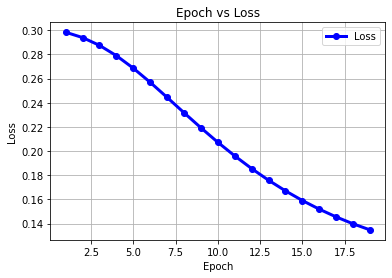

In [24]:
import matplotlib.pyplot as plt
plt.grid()
plt.plot(np.arange(1,20),log_loss,'bo-',label='Loss',linewidth=3)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.legend()
plt.show()

**Observations**

1.After consideration of above learning curve we can say that linear model was good-fit for this dataset beacause as we have seen that in the learning curve as epoch increases loss values gradually decreases.

2.After trining this model we can expect that on the training set the performance should with time was not detoriated.

3.As the loss will be low, which means that the model does a good job means model was good here.



In [25]:
len(X_test)

2000

In [26]:
z=(w * decision_function(X_test) + b)
result = sigmoid(z)


In [27]:
predict = []
for i in result:
    if i >=0.5:
        predict.append(1)
    else:
        predict.append(0)
print(np.array(predict))

[1 1 1 ... 1 1 1]


In [28]:
len(predict)

2000

__Note: in the above algorithm, the steps 2, 4 might need hyper parameter tuning, To reduce the complexity of the assignment we are excluding the hyerparameter tuning part, but intrested students can try that__


If any one wants to try other calibration algorithm istonic regression also please check these tutorials

1. http://fa.bianp.net/blog/tag/scikit-learn.html#fn:1

2. https://drive.google.com/open?id=1MzmA7QaP58RDzocB0RBmRiWfl7Co_VJ7

3. https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a

4. https://stat.fandom.com/wiki/Isotonic_regression#Pool_Adjacent_Violators_Algorithm
